# KNN - Correntes de motor

Testando 30 rodadas com algoritmo **KNN** nos conjuntos de dados de correntes de motor com dados extraídos por _dwt_.

## Importando Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from random import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score

## Declarando funções

In [3]:
def load_correntes():
    '''Retorna os 3 arquivos carregados em um único array'''
    return np.append(
                arr=np.load("corrente1.npy"),
                axis=0,
                values=np.append(
                        arr=np.load("corrente2.npy"),
                        values=np.load("corrente3.npy"),
                        axis=0))

def binarize(matriz7x7):
    '''Recebe a matriz de confusão (7, 7) e retorna uma matriz (2, 2) com seus elementos agrupados'''
    mBinaria = np.array([[0, 0],[0, 0]])

    for linha in range(7):
        if linha == 0:
            mBinaria[0] = [matriz7x7[0][0], sum(matriz7x7[0][1:])]
        else:
            mBinaria[1] += [matriz7x7[linha][0], sum(matriz7x7[linha][1:])]

    return mBinaria

def normalize(line):
    '''Recebe uma linha da matriz e a retorna normalizada em relação ao total de elementos da linha'''
    total = sum(line)
    return np.array([x / total for x in line])

def test_30_knn(x, y, y_labels, k_vizinhos):
    '''
    Executa 30 rodadas com KNN, imprimindo o resultado da classificação e plotando a matriz de confusão.

    Ao final, retorna 3 listas, contendo a acurácia, a sensibilidade e a matriz de confusão (não normalizada) ao longo das 30 rodadas, respectivamente.
    '''
    # Armazena os resultados de acurácia, sensibilidade e matriz de confusão que ao final serão retornados
    irisAcc = []
    irisRec = []
    matrixProdada = []

    # Armazena as sementes já usadas para não haver repetição
    usedSeed = []

    for i in range(30):

        # Gerando inteiro aleatório para distribuição dos dados
        semente = randint(0, 8001)
        
        while semente in usedSeed:
            semente = randint(0, 8001)
        
        usedSeed.append(semente)

        # Separando dados para treino e teste
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=semente)

        # Instanciando classificador
        classifier = KNeighborsClassifier(n_neighbors=k_vizinhos)

        # Treinando modelo
        classifier.fit(X_train, y_train)

        # Realizando teste de classificação
        y_pred = classifier.predict(X_test)

        # Adicionando resultados à lista
        acc = accuracy_score(y_test, y_pred)
        irisAcc.append(acc)

        rec = recall_score(y_test, y_pred, average=None)
        irisRec.append(rec)

        matrixProdada.append(confusion_matrix(y_test, y_pred, normalize=None))

        # Exibindo resultados da rodada
        print(f"\n- RODADA {i} - Semente {semente} -\n")
        print("- Acurácia {accuracy} -\n- Sensibilidade {recall} -\n".format(accuracy=acc, recall=rec))

        print(classification_report(y_test, y_pred, target_names=y_labels))

        print("Matriz de confusão normalizada")
        plot_confusion_matrix(
            estimator=classifier,
            X=X_test,
            y_true=y_test,
            display_labels=y_labels,
            cmap=plt.cm.Blues,
            normalize='true'
        )
        plt.show()
    return irisAcc, irisRec, matrixProdada

## Características dos dados

| Características     |  Valor|
|:--------------------|------:|
| Classes             |      7|
| Amostras            |   7851|
| Dimensionalidade    |     38|

## Carregando dados e rótulos, e gerando _DataFrame_

In [4]:
# Carregando data
data = load_correntes()

# Carregando Rótulos
labels = [
    'DesvioD1','DesvioD2','DesvioD3','DesvioD4','DesvioD5','DesvioA5',
    'MeanAD1','MeanAD2','MeanAD3','MeanAD4','MeanAD5','MeanADA5',
    'MedianAD1','MedianAD2','MedianAD3','MedianAD4','MedianAD5','MedianADA5',
    'KurtosisD1','KurtosisD2','KurtosisD3','KurtosisD4','KurtosisD5','KurtosisA5',
    'SkewnessD1','SkewnessD2','SkewnessD3','SkewnessD4','SkewnessD5','SkewnessA5',
    'EnergiaD1','EnergiaD2','EnergiaD3','EnergiaD4','EnergiaD5','EnergiaA5',
    'frequencia','classe','carga'
]

target_labels = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

# Gerando DataFrame
chainDF = pd.DataFrame(data=data, columns=labels).fillna(value=0)

chainCompleteDF = chainDF.copy()

targetS = chainDF.pop('classe') # Removeu a coluna 'classe' de chainDF

## `chainDF`

`chainDF` é um _DataFrame_, uma tabela com o conjunto de dados carregados

In [5]:
chainDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DesvioD1,7851.0,0.011659,0.001102,0.000000,0.011175,0.011460,0.012027,0.018549
DesvioD2,7851.0,0.013451,0.001709,0.000000,0.012369,0.013052,0.014401,0.020684
DesvioD3,7851.0,0.017627,0.004701,0.000000,0.014061,0.016503,0.019949,0.036409
DesvioD4,7851.0,0.063597,0.030260,0.000000,0.040414,0.057861,0.080548,0.172226
DesvioD5,7851.0,0.310475,0.148925,0.000000,0.192664,0.282100,0.396623,0.832394
DesvioA5,7851.0,3.312243,0.809602,0.000000,2.556062,3.069992,4.180307,5.370829
MeanAD1,7851.0,0.009272,0.000859,0.000000,0.008899,0.009123,0.009574,0.011858
MeanAD2,7851.0,0.010695,0.001334,0.000000,0.009862,0.010388,0.011450,0.015411
MeanAD3,7851.0,0.014307,0.004020,0.000000,0.011258,0.013320,0.016239,0.031664
MeanAD4,7851.0,0.054659,0.025998,0.000000,0.034660,0.049756,0.069357,0.150451


## `targetS`

`targetS` é apenas o que seria uma coluna, o que é chamado de _series_.

## Observando distribuição de classes

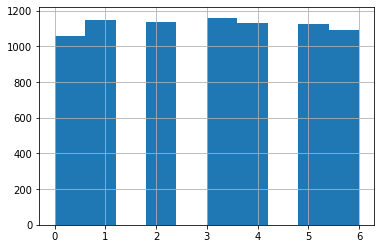

In [6]:
targetS.hist()

## Realizando 30 rodadas de Teste com KNN


- RODADA 0 - Semente 7756 -

- Acurácia 0.7156196943972836 -
- Sensibilidade [0.72238806 0.6        0.67701863 0.73714286 0.52513966 0.81231672
 0.93731343] -

              precision    recall  f1-score   support

      Normal       0.69      0.72      0.71       335
        HI-1       0.47      0.60      0.53       315
        HI-2       0.66      0.68      0.67       322
        HI-3       0.82      0.74      0.78       350
        LI-1       0.62      0.53      0.57       358
        LI-2       0.83      0.81      0.82       341
        LI-3       0.95      0.94      0.94       335

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


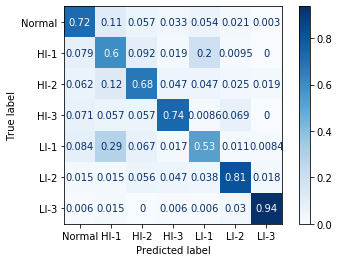


- RODADA 1 - Semente 3176 -

- Acurácia 0.7304753820033956 -
- Sensibilidade [0.75409836 0.5975976  0.69005848 0.78436658 0.56214689 0.78823529
 0.95819936] -

              precision    recall  f1-score   support

      Normal       0.73      0.75      0.74       305
        HI-1       0.53      0.60      0.56       333
        HI-2       0.68      0.69      0.68       342
        HI-3       0.81      0.78      0.80       371
        LI-1       0.62      0.56      0.59       354
        LI-2       0.82      0.79      0.81       340
        LI-3       0.96      0.96      0.96       311

    accuracy                           0.73      2356
   macro avg       0.74      0.73      0.73      2356
weighted avg       0.73      0.73      0.73      2356

Matriz de confusão normalizada


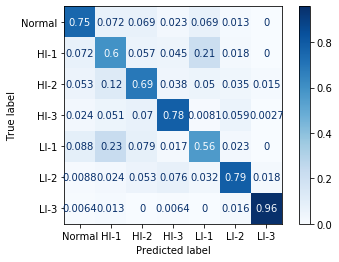


- RODADA 2 - Semente 6651 -

- Acurácia 0.716044142614601 -
- Sensibilidade [0.77666667 0.54705882 0.70212766 0.75070028 0.52678571 0.77011494
 0.93641618] -

              precision    recall  f1-score   support

      Normal       0.68      0.78      0.73       300
        HI-1       0.49      0.55      0.52       340
        HI-2       0.67      0.70      0.68       329
        HI-3       0.81      0.75      0.78       357
        LI-1       0.58      0.53      0.55       336
        LI-2       0.84      0.77      0.80       348
        LI-3       0.97      0.94      0.95       346

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


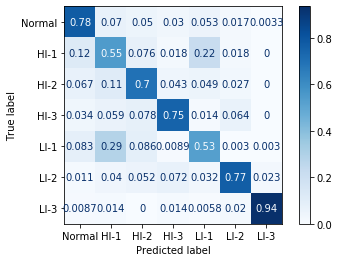


- RODADA 3 - Semente 993 -

- Acurácia 0.7300509337860781 -
- Sensibilidade [0.76307692 0.5813253  0.73230769 0.8258427  0.52905199 0.74022346
 0.92792793] -

              precision    recall  f1-score   support

      Normal       0.73      0.76      0.74       325
        HI-1       0.56      0.58      0.57       332
        HI-2       0.68      0.73      0.71       325
        HI-3       0.78      0.83      0.80       356
        LI-1       0.57      0.53      0.55       327
        LI-2       0.84      0.74      0.79       358
        LI-3       0.96      0.93      0.94       333

    accuracy                           0.73      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.73      0.73      2356

Matriz de confusão normalizada


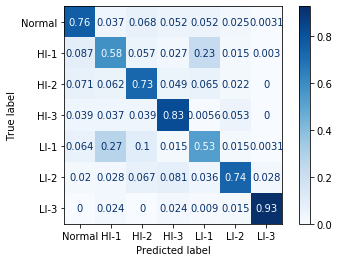


- RODADA 4 - Semente 740 -

- Acurácia 0.7181663837011885 -
- Sensibilidade [0.70496894 0.55752212 0.67816092 0.81268012 0.59475219 0.74631268
 0.94654088] -

              precision    recall  f1-score   support

      Normal       0.68      0.70      0.69       322
        HI-1       0.51      0.56      0.53       339
        HI-2       0.72      0.68      0.70       348
        HI-3       0.79      0.81      0.80       347
        LI-1       0.60      0.59      0.60       343
        LI-2       0.81      0.75      0.78       339
        LI-3       0.97      0.95      0.96       318

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


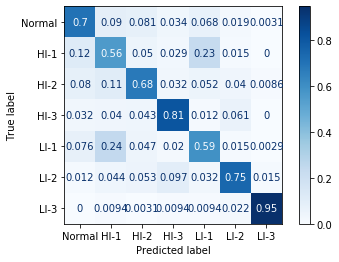


- RODADA 5 - Semente 6829 -

- Acurácia 0.7202886247877759 -
- Sensibilidade [0.70967742 0.60240964 0.68221574 0.8128655  0.5494186  0.76380368
 0.92987805] -

              precision    recall  f1-score   support

      Normal       0.71      0.71      0.71       341
        HI-1       0.51      0.60      0.55       332
        HI-2       0.67      0.68      0.68       343
        HI-3       0.79      0.81      0.80       342
        LI-1       0.61      0.55      0.58       344
        LI-2       0.83      0.76      0.80       326
        LI-3       0.98      0.93      0.96       328

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


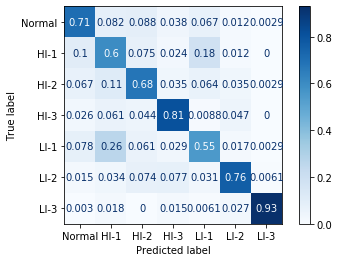


- RODADA 6 - Semente 50 -

- Acurácia 0.7134974533106961 -
- Sensibilidade [0.71571906 0.556231   0.70090634 0.76204819 0.51253482 0.80211082
 0.95107034] -

              precision    recall  f1-score   support

      Normal       0.65      0.72      0.68       299
        HI-1       0.47      0.56      0.51       329
        HI-2       0.66      0.70      0.68       331
        HI-3       0.78      0.76      0.77       332
        LI-1       0.62      0.51      0.56       359
        LI-2       0.86      0.80      0.83       379
        LI-3       0.98      0.95      0.96       327

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


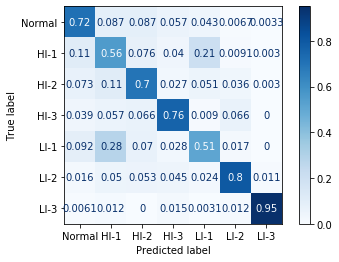


- RODADA 7 - Semente 1912 -

- Acurácia 0.7313242784380306 -
- Sensibilidade [0.75229358 0.62241888 0.66759777 0.82402235 0.55835962 0.74223602
 0.94328358] -

              precision    recall  f1-score   support

      Normal       0.70      0.75      0.73       327
        HI-1       0.55      0.62      0.59       339
        HI-2       0.68      0.67      0.67       358
        HI-3       0.80      0.82      0.81       358
        LI-1       0.60      0.56      0.58       317
        LI-2       0.84      0.74      0.79       322
        LI-3       0.98      0.94      0.96       335

    accuracy                           0.73      2356
   macro avg       0.74      0.73      0.73      2356
weighted avg       0.74      0.73      0.73      2356

Matriz de confusão normalizada


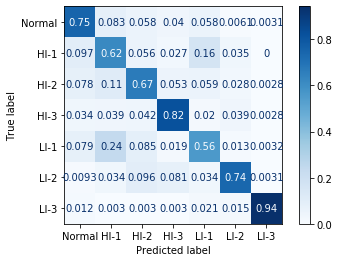


- RODADA 8 - Semente 5527 -

- Acurácia 0.7126485568760611 -
- Sensibilidade [0.74827586 0.5591716  0.64809384 0.81766382 0.53972603 0.7675841
 0.92151163] -

              precision    recall  f1-score   support

      Normal       0.65      0.75      0.70       290
        HI-1       0.50      0.56      0.53       338
        HI-2       0.68      0.65      0.66       341
        HI-3       0.80      0.82      0.81       351
        LI-1       0.61      0.54      0.57       365
        LI-2       0.82      0.77      0.79       327
        LI-3       0.98      0.92      0.95       344

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


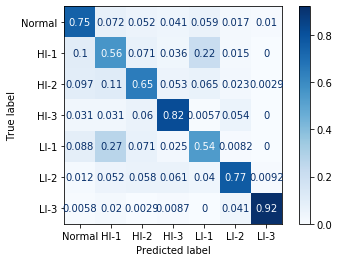


- RODADA 9 - Semente 2951 -

- Acurácia 0.7071307300509337 -
- Sensibilidade [0.72289157 0.58238636 0.62849162 0.77374302 0.56060606 0.79635258
 0.91582492] -

              precision    recall  f1-score   support

      Normal       0.72      0.72      0.72       332
        HI-1       0.47      0.58      0.52       352
        HI-2       0.74      0.63      0.68       358
        HI-3       0.80      0.77      0.79       358
        LI-1       0.56      0.56      0.56       330
        LI-2       0.80      0.80      0.80       329
        LI-3       0.97      0.92      0.94       297

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.72      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


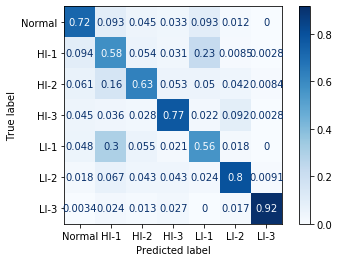


- RODADA 10 - Semente 2937 -

- Acurácia 0.7190152801358234 -
- Sensibilidade [0.71       0.56446991 0.7030303  0.81111111 0.50151057 0.79027356
 0.93557423] -

              precision    recall  f1-score   support

      Normal       0.67      0.71      0.69       300
        HI-1       0.50      0.56      0.53       349
        HI-2       0.70      0.70      0.70       330
        HI-3       0.84      0.81      0.82       360
        LI-1       0.56      0.50      0.53       331
        LI-2       0.81      0.79      0.80       329
        LI-3       0.99      0.94      0.96       357

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


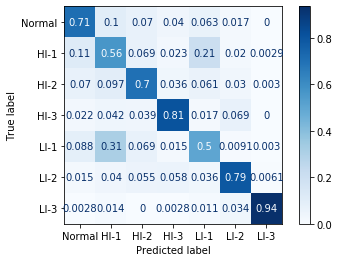


- RODADA 11 - Semente 5392 -

- Acurácia 0.7224108658743633 -
- Sensibilidade [0.74454829 0.58381503 0.6625387  0.78804348 0.52694611 0.80707395
 0.93484419] -

              precision    recall  f1-score   support

      Normal       0.73      0.74      0.74       321
        HI-1       0.51      0.58      0.54       346
        HI-2       0.66      0.66      0.66       323
        HI-3       0.80      0.79      0.79       368
        LI-1       0.61      0.53      0.56       334
        LI-2       0.80      0.81      0.80       311
        LI-3       0.97      0.93      0.95       353

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


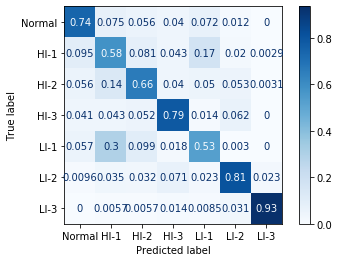


- RODADA 12 - Semente 1754 -

- Acurácia 0.7283531409168081 -
- Sensibilidade [0.73333333 0.61791045 0.70358306 0.79494382 0.51162791 0.76646707
 0.96      ] -

              precision    recall  f1-score   support

      Normal       0.74      0.73      0.74       330
        HI-1       0.53      0.62      0.57       335
        HI-2       0.64      0.70      0.67       307
        HI-3       0.81      0.79      0.80       356
        LI-1       0.61      0.51      0.56       344
        LI-2       0.82      0.77      0.79       334
        LI-3       0.96      0.96      0.96       350

    accuracy                           0.73      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.73      0.73      2356

Matriz de confusão normalizada


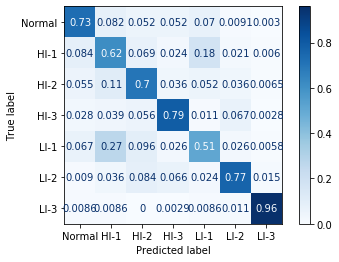


- RODADA 13 - Semente 490 -

- Acurácia 0.7041595925297114 -
- Sensibilidade [0.70382166 0.59482759 0.64759036 0.80118694 0.49266862 0.7574124
 0.94888179] -

              precision    recall  f1-score   support

      Normal       0.65      0.70      0.67       314
        HI-1       0.50      0.59      0.55       348
        HI-2       0.68      0.65      0.66       332
        HI-3       0.81      0.80      0.81       337
        LI-1       0.54      0.49      0.51       341
        LI-2       0.84      0.76      0.80       371
        LI-3       0.96      0.95      0.96       313

    accuracy                           0.70      2356
   macro avg       0.71      0.71      0.71      2356
weighted avg       0.71      0.70      0.71      2356

Matriz de confusão normalizada


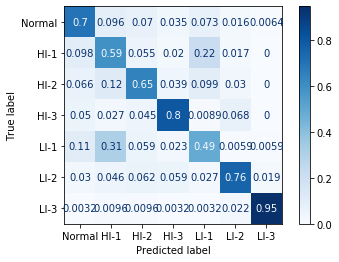


- RODADA 14 - Semente 4666 -

- Acurácia 0.7266553480475382 -
- Sensibilidade [0.71621622 0.64637681 0.68900804 0.76666667 0.55952381 0.78488372
 0.94701987] -

              precision    recall  f1-score   support

      Normal       0.67      0.72      0.69       296
        HI-1       0.54      0.65      0.59       345
        HI-2       0.76      0.69      0.72       373
        HI-3       0.81      0.77      0.79       360
        LI-1       0.60      0.56      0.58       336
        LI-2       0.80      0.78      0.79       344
        LI-3       0.98      0.95      0.96       302

    accuracy                           0.73      2356
   macro avg       0.74      0.73      0.73      2356
weighted avg       0.73      0.73      0.73      2356

Matriz de confusão normalizada


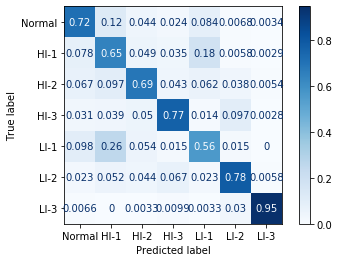


- RODADA 15 - Semente 6037 -

- Acurácia 0.7236842105263158 -
- Sensibilidade [0.76206897 0.6        0.6565097  0.78947368 0.5362776  0.76807229
 0.94285714] -

              precision    recall  f1-score   support

      Normal       0.67      0.76      0.71       290
        HI-1       0.53      0.60      0.56       345
        HI-2       0.70      0.66      0.68       361
        HI-3       0.82      0.79      0.81       361
        LI-1       0.60      0.54      0.57       317
        LI-2       0.78      0.77      0.78       332
        LI-3       0.99      0.94      0.96       350

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.73      2356

Matriz de confusão normalizada


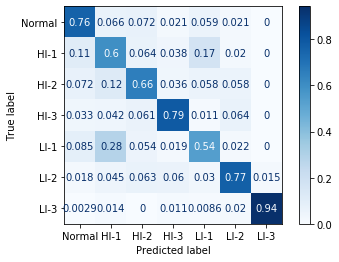


- RODADA 16 - Semente 4843 -

- Acurácia 0.7313242784380306 -
- Sensibilidade [0.74382716 0.60060976 0.69298246 0.77014925 0.60120846 0.7592068
 0.94169096] -

              precision    recall  f1-score   support

      Normal       0.71      0.74      0.73       324
        HI-1       0.54      0.60      0.57       328
        HI-2       0.69      0.69      0.69       342
        HI-3       0.78      0.77      0.78       335
        LI-1       0.60      0.60      0.60       331
        LI-2       0.85      0.76      0.80       353
        LI-3       0.97      0.94      0.96       343

    accuracy                           0.73      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.74      0.73      0.73      2356

Matriz de confusão normalizada


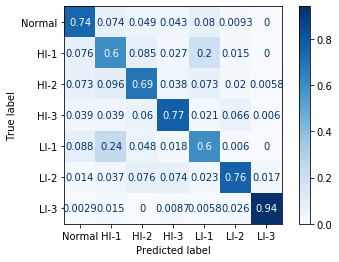


- RODADA 17 - Semente 7975 -

- Acurácia 0.7198641765704584 -
- Sensibilidade [0.75925926 0.58356941 0.68292683 0.73487032 0.58579882 0.75438596
 0.9537037 ] -

              precision    recall  f1-score   support

      Normal       0.69      0.76      0.72       324
        HI-1       0.54      0.58      0.56       353
        HI-2       0.65      0.68      0.67       328
        HI-3       0.81      0.73      0.77       347
        LI-1       0.65      0.59      0.61       338
        LI-2       0.81      0.75      0.78       342
        LI-3       0.94      0.95      0.95       324

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


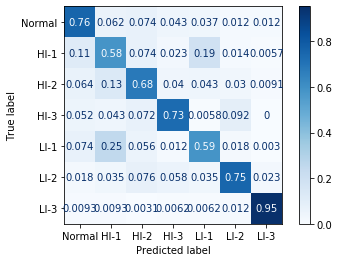


- RODADA 18 - Semente 4235 -

- Acurácia 0.7101018675721562 -
- Sensibilidade [0.70529801 0.58591549 0.7120743  0.78735632 0.46884273 0.77374302
 0.93993994] -

              precision    recall  f1-score   support

      Normal       0.73      0.71      0.72       302
        HI-1       0.50      0.59      0.54       355
        HI-2       0.68      0.71      0.70       323
        HI-3       0.82      0.79      0.80       348
        LI-1       0.50      0.47      0.48       337
        LI-2       0.83      0.77      0.80       358
        LI-3       0.96      0.94      0.95       333

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


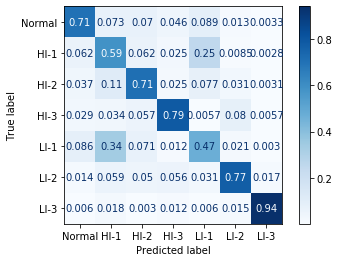


- RODADA 19 - Semente 2209 -

- Acurácia 0.7088285229202037 -
- Sensibilidade [0.71768707 0.54847645 0.6460177  0.78869048 0.53230769 0.78962536
 0.93220339] -

              precision    recall  f1-score   support

      Normal       0.65      0.72      0.68       294
        HI-1       0.52      0.55      0.53       361
        HI-2       0.67      0.65      0.66       339
        HI-3       0.79      0.79      0.79       336
        LI-1       0.55      0.53      0.54       325
        LI-2       0.81      0.79      0.80       347
        LI-3       0.98      0.93      0.96       354

    accuracy                           0.71      2356
   macro avg       0.71      0.71      0.71      2356
weighted avg       0.71      0.71      0.71      2356

Matriz de confusão normalizada


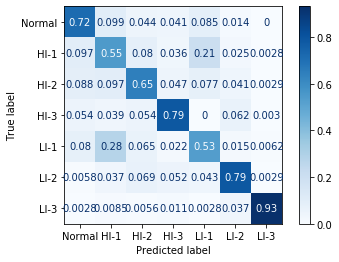


- RODADA 20 - Semente 2282 -

- Acurácia 0.7173174872665535 -
- Sensibilidade [0.75649351 0.55434783 0.6625387  0.77878788 0.54252199 0.77272727
 0.97305389] -

              precision    recall  f1-score   support

      Normal       0.70      0.76      0.73       308
        HI-1       0.53      0.55      0.54       368
        HI-2       0.64      0.66      0.65       323
        HI-3       0.82      0.78      0.80       330
        LI-1       0.56      0.54      0.55       341
        LI-2       0.83      0.77      0.80       352
        LI-3       0.97      0.97      0.97       334

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


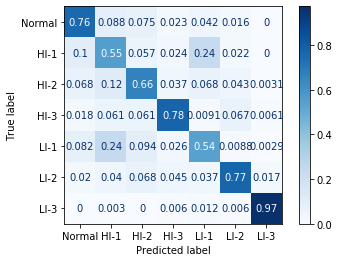


- RODADA 21 - Semente 3536 -

- Acurácia 0.7232597623089984 -
- Sensibilidade [0.72151899 0.58934169 0.71428571 0.79487179 0.51800554 0.77777778
 0.95987654] -

              precision    recall  f1-score   support

      Normal       0.68      0.72      0.70       316
        HI-1       0.51      0.59      0.54       319
        HI-2       0.69      0.71      0.70       343
        HI-3       0.80      0.79      0.80       351
        LI-1       0.60      0.52      0.55       361
        LI-2       0.84      0.78      0.81       342
        LI-3       0.97      0.96      0.97       324

    accuracy                           0.72      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


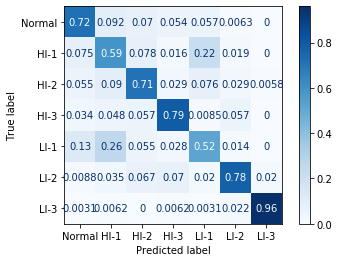


- RODADA 22 - Semente 2556 -

- Acurácia 0.7279286926994907 -
- Sensibilidade [0.73376623 0.64117647 0.70348837 0.78125    0.54205607 0.74137931
 0.93877551] -

              precision    recall  f1-score   support

      Normal       0.70      0.73      0.71       308
        HI-1       0.52      0.64      0.57       340
        HI-2       0.70      0.70      0.70       344
        HI-3       0.82      0.78      0.80       352
        LI-1       0.59      0.54      0.56       321
        LI-2       0.85      0.74      0.79       348
        LI-3       0.98      0.94      0.96       343

    accuracy                           0.73      2356
   macro avg       0.74      0.73      0.73      2356
weighted avg       0.74      0.73      0.73      2356

Matriz de confusão normalizada


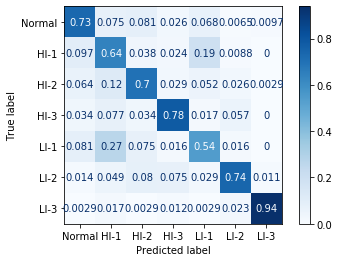


- RODADA 23 - Semente 3741 -

- Acurácia 0.730899830220713 -
- Sensibilidade [0.72697368 0.57222222 0.72988506 0.80895522 0.54867257 0.79566563
 0.94236311] -

              precision    recall  f1-score   support

      Normal       0.67      0.73      0.70       304
        HI-1       0.56      0.57      0.56       360
        HI-2       0.73      0.73      0.73       348
        HI-3       0.79      0.81      0.80       335
        LI-1       0.59      0.55      0.57       339
        LI-2       0.83      0.80      0.81       323
        LI-3       0.98      0.94      0.96       347

    accuracy                           0.73      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.73      0.73      2356

Matriz de confusão normalizada


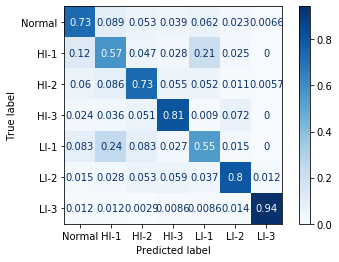


- RODADA 24 - Semente 7859 -

- Acurácia 0.7249575551782682 -
- Sensibilidade [0.76393443 0.59237537 0.67696629 0.77556818 0.53395062 0.79765396
 0.93175074] -

              precision    recall  f1-score   support

      Normal       0.69      0.76      0.72       305
        HI-1       0.52      0.59      0.55       341
        HI-2       0.71      0.68      0.69       356
        HI-3       0.81      0.78      0.79       352
        LI-1       0.61      0.53      0.57       324
        LI-2       0.79      0.80      0.79       341
        LI-3       0.98      0.93      0.96       337

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.73      2356
weighted avg       0.73      0.72      0.73      2356

Matriz de confusão normalizada


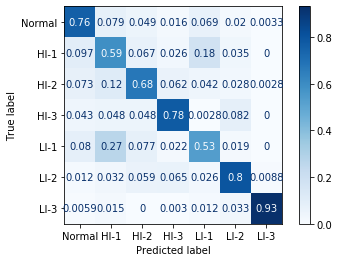


- RODADA 25 - Semente 2910 -

- Acurácia 0.7198641765704584 -
- Sensibilidade [0.72972973 0.57957958 0.71714286 0.78474114 0.54654655 0.7641791
 0.92786885] -

              precision    recall  f1-score   support

      Normal       0.72      0.73      0.73       333
        HI-1       0.50      0.58      0.54       333
        HI-2       0.69      0.72      0.70       350
        HI-3       0.80      0.78      0.79       367
        LI-1       0.59      0.55      0.57       333
        LI-2       0.82      0.76      0.79       335
        LI-3       0.99      0.93      0.96       305

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


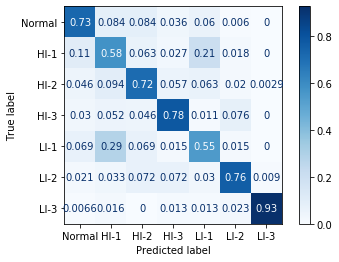


- RODADA 26 - Semente 5171 -

- Acurácia 0.7122241086587436 -
- Sensibilidade [0.72847682 0.55654762 0.70967742 0.76470588 0.53179191 0.77039275
 0.93251534] -

              precision    recall  f1-score   support

      Normal       0.68      0.73      0.70       302
        HI-1       0.50      0.56      0.53       336
        HI-2       0.70      0.71      0.70       341
        HI-3       0.79      0.76      0.78       374
        LI-1       0.58      0.53      0.56       346
        LI-2       0.79      0.77      0.78       331
        LI-3       0.98      0.93      0.96       326

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


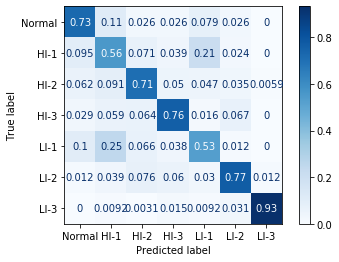


- RODADA 27 - Semente 7693 -

- Acurácia 0.7147707979626485 -
- Sensibilidade [0.71962617 0.57099698 0.63098592 0.77134986 0.57680251 0.79464286
 0.93353474] -

              precision    recall  f1-score   support

      Normal       0.71      0.72      0.71       321
        HI-1       0.51      0.57      0.54       331
        HI-2       0.70      0.63      0.66       355
        HI-3       0.79      0.77      0.78       363
        LI-1       0.54      0.58      0.56       319
        LI-2       0.82      0.79      0.81       336
        LI-3       0.97      0.93      0.95       331

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


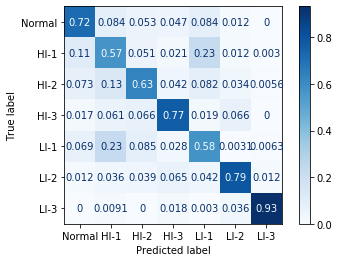


- RODADA 28 - Semente 7829 -

- Acurácia 0.7173174872665535 -
- Sensibilidade [0.71875    0.60802469 0.69018405 0.78236915 0.55907781 0.75358166
 0.90825688] -

              precision    recall  f1-score   support

      Normal       0.68      0.72      0.70       320
        HI-1       0.51      0.61      0.55       324
        HI-2       0.71      0.69      0.70       326
        HI-3       0.79      0.78      0.78       363
        LI-1       0.60      0.56      0.58       347
        LI-2       0.81      0.75      0.78       349
        LI-3       0.98      0.91      0.94       327

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


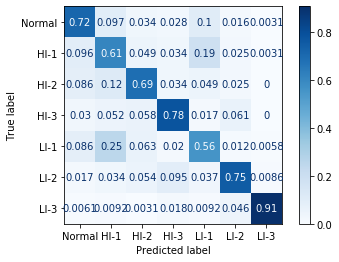


- RODADA 29 - Semente 7540 -

- Acurácia 0.7185908319185059 -
- Sensibilidade [0.76644737 0.54901961 0.67714286 0.77233429 0.54654655 0.77777778
 0.95783133] -

              precision    recall  f1-score   support

      Normal       0.67      0.77      0.71       304
        HI-1       0.51      0.55      0.53       357
        HI-2       0.72      0.68      0.70       350
        HI-3       0.82      0.77      0.80       347
        LI-1       0.56      0.55      0.55       333
        LI-2       0.84      0.78      0.81       333
        LI-3       0.97      0.96      0.96       332

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


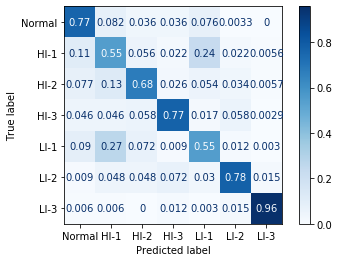

In [7]:
accuracy, recall, confusion = test_30_knn(x=chainDF.values, y=targetS.values, y_labels=target_labels, k_vizinhos=5)

## Gerando DataFrame de Acurácia e Sensibilidade por rodada

In [8]:
metricDF = pd.DataFrame(
    data=recall,
    columns=[f'S - {name}' for name in target_labels])

metricDF['Acurácia'] = accuracy
metricDF

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
0,0.722388,0.600000,0.677019,0.737143,0.525140,0.812317,0.937313,0.715620
1,0.754098,0.597598,0.690058,0.784367,0.562147,0.788235,0.958199,0.730475
2,0.776667,0.547059,0.702128,0.750700,0.526786,0.770115,0.936416,0.716044
3,0.763077,0.581325,0.732308,0.825843,0.529052,0.740223,0.927928,0.730051
4,0.704969,0.557522,0.678161,0.812680,0.594752,0.746313,0.946541,0.718166
5,0.709677,0.602410,0.682216,0.812865,0.549419,0.763804,0.929878,0.720289
6,0.715719,0.556231,0.700906,0.762048,0.512535,0.802111,0.951070,0.713497
7,0.752294,0.622419,0.667598,0.824022,0.558360,0.742236,0.943284,0.731324
8,0.748276,0.559172,0.648094,0.817664,0.539726,0.767584,0.921512,0.712649
9,0.722892,0.582386,0.628492,0.773743,0.560606,0.796353,0.915825,0.707131


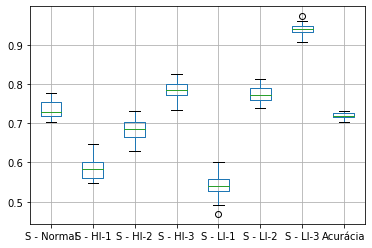

In [9]:
metricDF.boxplot()

In [10]:
metricDF.describe()

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.734394,0.584857,0.683851,0.784950,0.540707,0.774207,0.940350,0.719892
std,0.021420,0.026368,0.027481,0.023238,0.028845,0.020175,0.013977,0.007648
min,0.703822,0.547059,0.628492,0.734870,0.468843,0.740223,0.908257,0.704160
25%,0.717953,0.560496,0.663803,0.771596,0.526826,0.760356,0.932281,0.714983
50%,0.729103,0.583692,0.685967,0.784554,0.540891,0.771560,0.939358,0.719440
75%,0.753647,0.600000,0.703374,0.799626,0.558898,0.790112,0.948416,0.726231
max,0.776667,0.646377,0.732308,0.825843,0.601208,0.812317,0.973054,0.731324


## Gerando _DataFrame_ da matriz de confusão por rodada

In [11]:
confusion_resized = np.resize(confusion, (30, 49))

confusion_labels = [f"T {truelabel} x P {predlabel}" for truelabel in target_labels for predlabel in target_labels]

confusionTurnDF = pd.DataFrame(
    data=confusion_resized,
    columns=confusion_labels
)

confusionTurnDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T Normal x P Normal,30.0,229.866667,11.500325,211.0,221.00,230.5,240.75,248.0
T Normal x P HI-1,30.0,26.333333,5.214921,12.0,23.25,27.0,29.00,37.0
T Normal x P HI-2,30.0,19.000000,5.356273,8.0,15.00,19.0,22.00,30.0
T Normal x P HI-3,30.0,11.500000,3.380981,5.0,9.00,12.0,13.75,17.0
T Normal x P LI-1,30.0,21.200000,4.964703,12.0,18.00,21.0,23.75,33.0
T Normal x P LI-2,30.0,4.300000,1.859737,1.0,3.00,4.0,5.00,8.0
T Normal x P LI-3,30.0,0.866667,1.041661,0.0,0.00,1.0,1.00,4.0
T HI-1 x P Normal,30.0,33.100000,5.517058,22.0,29.50,33.5,37.00,43.0
T HI-1 x P HI-1,30.0,199.200000,9.675422,183.0,190.00,198.5,206.00,223.0
T HI-1 x P HI-2,30.0,21.900000,4.196468,13.0,19.00,22.0,25.00,29.0


## Matriz de confusão média

In [12]:
# Matriz com o somatório das 30 matrizes de confusão
confusion_sum = sum(confusion)

# Matriz com média aritmética das 30 marizes de confusão 
confusion_mean = [[x / 30 for x in line] for line in confusion_sum]

confusionDF = pd.DataFrame(
    data=confusion_mean,
    columns=[f'P - {label}' for label in target_labels],
    index=[f'True - {label}' for label in target_labels]
)

confusionDF

,P - Normal,P - HI-1,P - HI-2,P - HI-3,P - LI-1,P - LI-2,P - LI-3
True - Normal,229.866667,26.333333,19.000000,11.500000,21.200000,4.300000,0.866667
True - HI-1,33.100000,199.200000,21.900000,9.666667,70.300000,6.066667,0.533333
True - HI-2,22.933333,37.800000,232.200000,13.966667,20.233333,10.966667,1.600000
True - HI-3,12.400000,16.400000,18.966667,276.400000,4.100000,23.433333,0.433333
True - LI-1,28.000000,91.000000,23.966667,6.866667,182.533333,4.566667,0.766667
True - LI-2,4.966667,13.466667,20.800000,22.433333,10.633333,263.700000,4.666667
True - LI-3,1.533333,3.966667,0.700000,3.566667,2.233333,7.800000,312.166667


## Matriz de confusão média normalizada

In [13]:
confusionNormDF = pd.DataFrame(
    data=[normalize(row) for row in confusion_mean],
    columns=[f'P - {label}' for label in target_labels],
    index=[f'True - {label}' for label in target_labels]
)

confusionNormDF

,P - Normal,P - HI-1,P - HI-2,P - HI-3,P - LI-1,P - LI-2,P - LI-3
True - Normal,0.734242,0.084114,0.060690,0.036733,0.067717,0.013735,0.002768
True - HI-1,0.097134,0.584564,0.064267,0.028367,0.206300,0.017803,0.001565
True - HI-2,0.067511,0.111275,0.683544,0.041115,0.059562,0.032283,0.004710
True - HI-3,0.035214,0.046573,0.053862,0.784930,0.011643,0.066547,0.001231
True - LI-1,0.082914,0.269470,0.070970,0.020334,0.540519,0.013523,0.002270
True - LI-2,0.014579,0.039530,0.061057,0.065851,0.031213,0.774070,0.013699
True - LI-3,0.004619,0.011949,0.002109,0.010744,0.006728,0.023496,0.940355


## Gerando _DataFrame_ da matriz de confusão binarizada por rodada

In [14]:
confusionBinary = [binarize(matrix) for matrix in confusion]

confusionBinaryDF = pd.DataFrame(
    data=np.resize(confusionBinary, (30, 4)),
    columns=['true normal', 'false fail','false normal', 'true fail']
)

confusionBinaryDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
true normal,30.0,229.866667,11.500325,211.0,221.00,230.5,240.75,248.0
false fail,30.0,83.200000,8.193353,67.0,77.25,83.0,89.75,99.0
false normal,30.0,102.933333,10.123150,80.0,95.75,105.5,109.00,121.0
true fail,30.0,1940.000000,14.207817,1914.0,1929.25,1942.5,1949.00,1974.0


## Matriz de confusão binarizada média

In [15]:
# Matriz com o somatório das 30 matrizes de confusão
confusion_binary_sum = sum(confusionBinary)

# Matriz com média aritmética das 30 marizes de confusão 
confusion_binary_mean = [[x / 30 for x in line] for line in confusion_binary_sum]

confusionBDF = pd.DataFrame(
    data=confusion_binary_mean,
    columns=['Pred-Normal', 'Pred-Fail'],
    index=['True-Normal', 'True-Fail']
)

confusionBDF

,Pred-Normal,Pred-Fail
True-Normal,229.866667,83.2
True-Fail,102.933333,1940.0


## Matriz de confusão binarizada média normalizada

In [16]:
confusionBDF = pd.DataFrame(
    data=[normalize(row) for row in confusion_binary_mean],
    columns=['Pred-Normal', 'Pred-Fail'],
    index=['True-Normal', 'True-Fail']
)

confusionBDF

,Pred-Normal,Pred-Fail
True-Normal,0.734242,0.265758
True-Fail,0.050385,0.949615
